# Analysis notebook for Bayesian inference 
### August George, 2022, OHSU

#### RMSD

#### 1D marginal posterior distributions

# pocoMC sampler (preconditioned Monte Carlo)

### 12D model

In [ ]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pickle, glob, os


# parameter info for model
p_info = [   
        ["log10_k1_f",6,12,10.],
        ["log10_k1_r",-1,5,3.],
        ["log10_k2_f",-2,4,2.],
        ["log10_k2_r",-2,4,2.],
        ["log10_k3_f",3,9,7.],
        ["log10_k3_r",-1,5,3.],
        ["log10_k4_f",-1,5,3.],
        ["log10_k4_r",6,12,10.],
        ["log10_k5_f",-2,4,2.],
        ["log10_k5_r",-2,4,2.],
        ["log10_k6_f",-1,5,3.],
        ["log10_sigma",np.log10(5e-14), np.log10(5e-13), -13],
]
p_true = [p_i[3] for p_i in p_info]
p_labels = [p[0] for p in p_info]
p_bounds = [(p[1], p[2]) for p in p_info]


# load sample data files
data_dir = '/Users/georgeau/Desktop/research_data/2022_09_22_1expB125/'
data_files = glob.glob(os.path.join(data_dir, '**/samples.csv'),recursive=True)
dfs = []
for file in data_files:
    dfs.append(pd.read_csv(file, names=p_labels, skiprows=0))
print(f"using {len(dfs)} dataframes")
df_concat = pd.concat(dfs)    
# plot histograms



n_bins = 100
fig, axs = plt.subplots(4,3, figsize=(15,15))
p_n_list = []
b_n_list = []
for i, ax in enumerate(axs.flat):
    n_list = []
    for j, df_tmp in enumerate(dfs):       
        data_tmp = df_tmp.iloc[:,i]
        n,b,p = ax.hist(data_tmp, density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.5, histtype='step')
        n_list.append(n)
    ax.hist(df_concat.iloc[:,i], density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=1.0, color='black', histtype='step', label='agg')
    ax.legend()
    ax.set_title(f'p_{i} distribution')
    ax.set_xlim(p_bounds[i][0], p_bounds[i][1])
    ax.axvline(p_true[i], 0,1, ls='--', color='k')
    p_n_list.append(n_list)
    b_n_list.append(b)
plt.suptitle(f"1D parameter distributions")
plt.tight_layout()    

n_bins = 100
fig, axs = plt.subplots(4,3, figsize=(15,15))
p_n_list = []
b_n_list = []
for i, ax in enumerate(axs.flat):
    mean_list = []
    stdev_list = []
    data_list = []
    for j, df_tmp in enumerate(dfs):
        data_tmp = df_tmp.iloc[:,i]
        mean_list.append(data_tmp.mean())
        stdev_list.append(data_tmp.std())
        data_list.append(data_tmp)
    ax.violinplot(data_list, vert=False, showmeans=True, showmedians=False, widths=0.75)
    ax.boxplot(data_list, vert=False, widths=0.75, sym='', whis=(2.5, 97.5))
    ax.axvline(p_true[i], 0,1, ls='--', color='k')
    ax.set_title(f'p_{i}')
    ax.set_xlim(p_bounds[i][0], p_bounds[i][1])
plt.suptitle(f"replica violin plots")
plt.tight_layout()    



### 15D model

using 5 dataframes


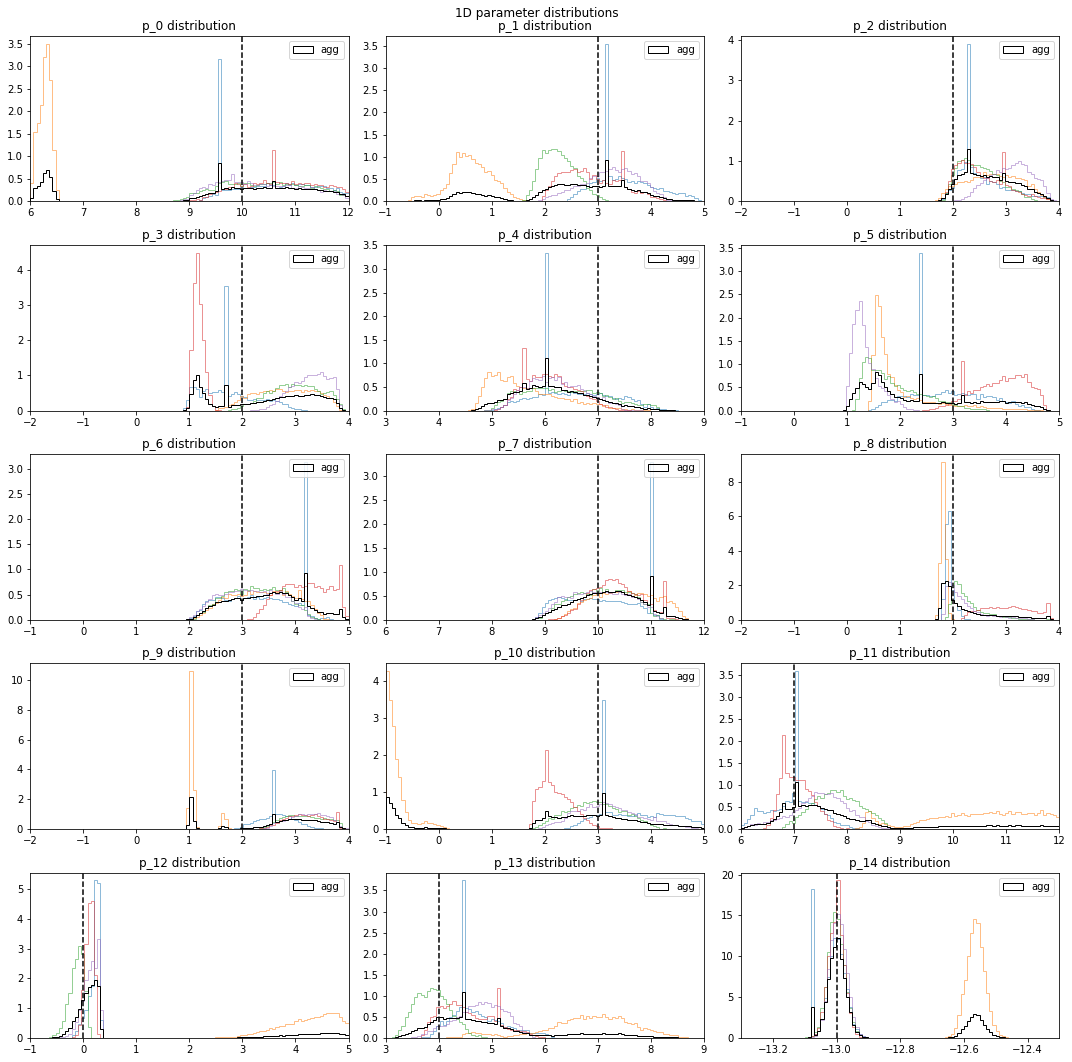

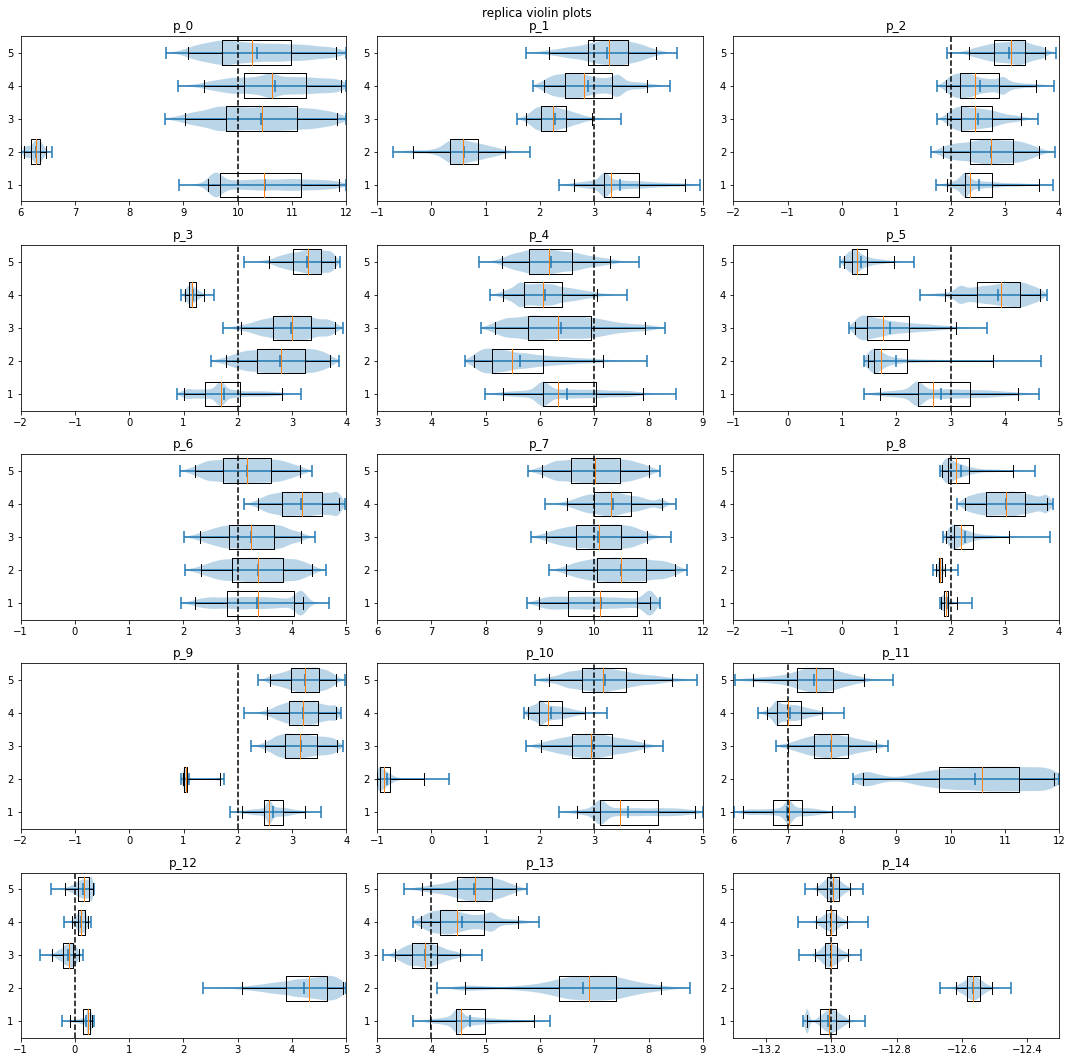

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pickle, glob, os


# parameter info for model
p_info = [   
        ["log10_k1_f",6,12,10.],
        ["log10_k1_r",-1,5,3.],
        ["log10_k2_f",-2,4,2.],
        ["log10_k2_r",-2,4,2.],
        ["log10_k3_f",3,9,7.],
        ["log10_k3_r",-1,5,3.],
        ["log10_k4_f",-1,5,3.],
        ["log10_k4_r",6,12,10.],
        ["log10_k5_f",-2,4,2.],
        ["log10_k5_r",-2,4,2.],
        ["log10_k6_f",-1,5,3.],
        ["log10_k7_f", 6, 12, 7], 
        ["log10_k8_f", -1, 5, 0], 
        ["log10_k8_r", 3, 9, 4], 
        ["log10_sigma",np.log10(5e-14), np.log10(5e-13), -13],
]
p_true = [p_i[3] for p_i in p_info]
p_labels = [p[0] for p in p_info]
p_bounds = [(p[1], p[2]) for p in p_info]


# load sample data files
data_dir = '/Users/georgeau/Desktop/research_data/2022_09_30_c1_1exp/'
data_files = glob.glob(os.path.join(data_dir, '**/samples.csv'),recursive=True)
dfs = []
for file in data_files:
    dfs.append(pd.read_csv(file, names=p_labels, skiprows=0))
print(f"using {len(dfs)} dataframes")
df_concat = pd.concat(dfs)    
# plot histograms

n_bins = 100
fig, axs = plt.subplots(5,3, figsize=(15,15))
p_n_list = []
b_n_list = []
for i, ax in enumerate(axs.flat):
    n_list = []
    for j, df_tmp in enumerate(dfs):       
        data_tmp = df_tmp.iloc[:,i]
        n,b,p = ax.hist(data_tmp, density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=0.5, histtype='step')
        n_list.append(n)
    ax.hist(df_concat.iloc[:,i], density=True, bins=n_bins, range=(p_bounds[i][0],p_bounds[i][1]), alpha=1.0, color='black', histtype='step', label='agg')
    ax.legend()
    ax.set_title(f'p_{i} distribution')
    ax.set_xlim(p_bounds[i][0], p_bounds[i][1])
    ax.axvline(p_true[i], 0,1, ls='--', color='k')
    p_n_list.append(n_list)
    b_n_list.append(b)
plt.suptitle(f"1D parameter distributions")
plt.tight_layout()    

n_bins = 100
fig, axs = plt.subplots(5,3, figsize=(15,15))
p_n_list = []
b_n_list = []
for i, ax in enumerate(axs.flat):
    mean_list = []
    stdev_list = []
    data_list = []
    for j, df_tmp in enumerate(dfs):
        data_tmp = df_tmp.iloc[:,i]
        mean_list.append(data_tmp.mean())
        stdev_list.append(data_tmp.std())
        data_list.append(data_tmp)
    ax.violinplot(data_list, vert=False, showmeans=True, showmedians=False, widths=0.75)
    ax.boxplot(data_list, vert=False, widths=0.75, sym='', whis=(2.5, 97.5))
    ax.axvline(p_true[i], 0,1, ls='--', color='k')
    ax.set_title(f'p_{i}')
    ax.set_xlim(p_bounds[i][0], p_bounds[i][1])
plt.suptitle(f"replica violin plots")
plt.tight_layout()    


